Number of clusters is 128
Inertia : 0.1703150975725726
Homogeneity :       0.94771168907488
Accuracy score : 0.9510567296996663




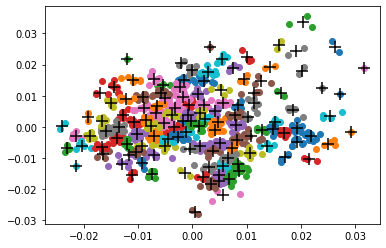

In [71]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)
number_of_instances=digits.images.shape[0]


x_train, x_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images.reshape(number_of_instances,64),test_size=0.5, random_state=42)

# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)

total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = KMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)

def retrieve_info(cluster_labels,y_train):
 
# Initializing
 reference_labels = {}
# For loop to run through each label of cluster label
 for i in range(len(np.unique(kmeans.labels_))):
  index = np.where(cluster_labels == i,1,0)
  num = np.bincount(y_train[index==1]).argmax()
  reference_labels[i] = num
 return reference_labels

 print(reference_labels)

reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]


# Function to calculate metrics for the model
def calculate_metrics(model,output):
 print("Number of clusters is {}".format(model.n_clusters))
 print("Inertia : {}".format(model.inertia_))
 print("Homogeneity :       {}".format(metrics.homogeneity_score(output,model.labels_)))

 
# Testing model on Testing set
# Initialize the K-Means model
kmeans = KMeans(n_clusters = 128)
# Fitting the model to testing set
kmeans.fit_predict(x_test)

# Calculating the metrics
calculate_metrics(kmeans,y_test)



# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 
 number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

pca = PCA(2)
 
df2 = pca.fit_transform(x_test)
kmeans = KMeans(n_clusters = 128)
label = kmeans.fit_predict(df2)
u_labels = np.unique(label)



for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
centroidss = kmeans.cluster_centers_
plt.scatter(centroidss[:, 0], centroidss[:, 1],
           marker='+', s=150, linewidths=0.5,
           color='black', zorder = 10)

plt.show()


    


